# Classification Problems

CSC/DSC 340 Week 4 Slides

Author: Dr. Julie Butler

Date Created: August 13, 2023

Last Modified: August 14, 2023

## What are Classification Problems?
* Goal: Determine what "class" a data point belongs to
* Regression: output can be any real number
* Classification: output can only be taken from finite and discrete set

## Classification Examples
* Can the condition of a car be determined from its price and odometer reading?
* Can the species of a plant or animal be determined from various measurements?
* Can the sex of an animal be determined from various measurements?
* Can handwritten numbers be converted to text (MNIST Data Set)?
* Can pictures of clothes be identified?
* Can pictures be determined to contain dogs or cats?

## Types of Classification Problems
* Binimal Classifier: data is sorted into one of two categories
* Multiclass Classifier: data is sorted into one of three or more categories
* Multilabel Classifier: data can belong to more than one category

## Classifiers
* Ridge Classifier (this week)
* Stochastic Gradient Descent (*Hands-On* Chapter 3)
* Support Vector Machines (not covered)
* Neural Networks/Convolutional Neural Networks (covered later)

### Ridge Classifier

* Scikit-Learn implementation
* Using ridge regression but converts it into a classification problem
* Binomial classification
    * Inputs are mapped to outputs between -1 and 1
    * Class 0 corresponds to a negative output and class 1 corresponds to a positive output
* Multiclass classification
    * Treat as multi-output regression problem and output with higest value is the category
* Simple classification algorithm but computationally effecient

## Error Metrics
* The error metrics we have mean using are not suitable to determine the performance of a classifier
* New error metrics
    * Accuracy Score
    * Confusion Matrix
    * Other error metrics are covered in Chapter 3 of *Hands-On Machine Learning*

### Accuracy Score
$$ Score = \frac{Number\ of\ Correct\ Predictions}{Total\ Number\ of\ Data\ Points}$$

* A score of 1.0 means 100% of the predictions are classified correctly
* A score of 0.0 means 0% of the predictions are classified correctly

### Confusion Matrix
* Each row represents an actual class, each column represents a predicted class
* Numbers of the main diagonal are correct predictions and numbers on the off diagonal elements are in correct predictions
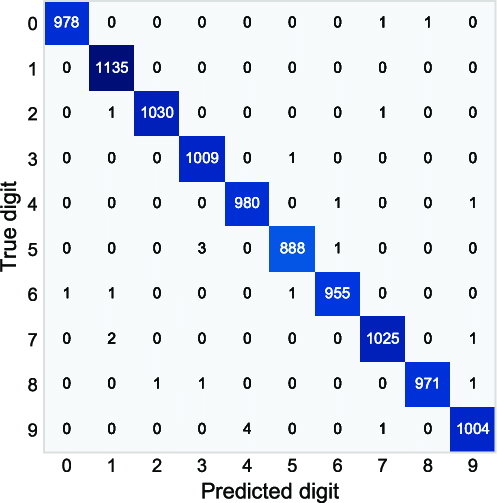
[Image Source](https://www.researchgate.net/figure/Confusion-matrix-for-the-MNIST-dataset-with-the-best-ensemble_fig3_328816477)

## Example: The Iris Data Set and the Ridge Classifier
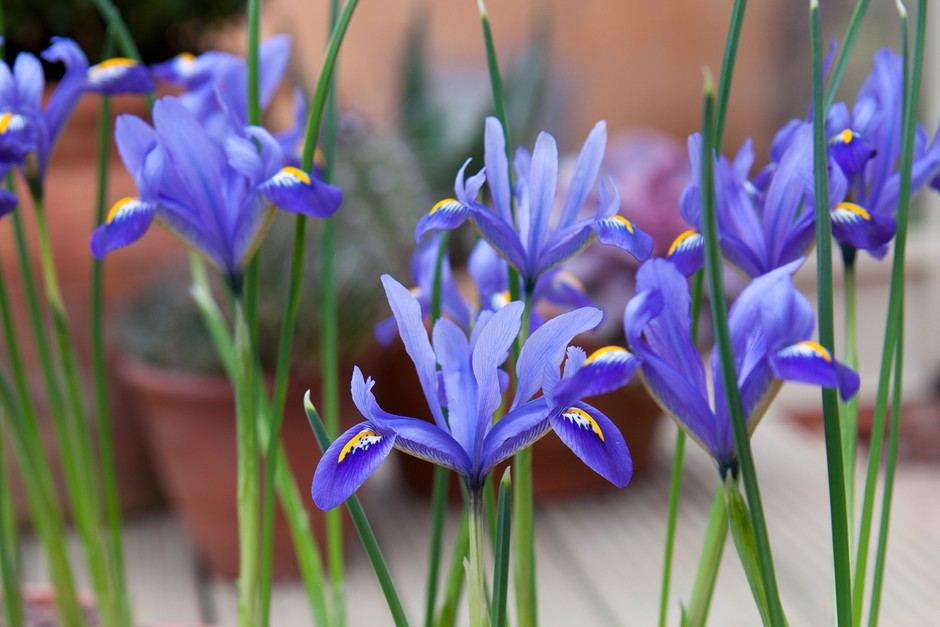
* The Iris Data Set is a famous classification data set
* Each point contains measurements of different parts of the flower and the specific variety of iris it belongs to
* Goal is to predict what type of iris each flower is
* [Image Source](https://www.gardenersworld.com/how-to/grow-plants/how-to-grow-iris/)

In [1]:
##############################
##          IMPORTS         ##
##############################
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split

In [2]:
# Load the iris dataset from sklearn
iris = load_iris()

# Convert the iris dataset to a pandas dataframe
iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add the target variable to the dataframe
iris_data['target'] = iris.target

In [3]:
# Determine what data the iris data set contains
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


/Users/butlerju/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


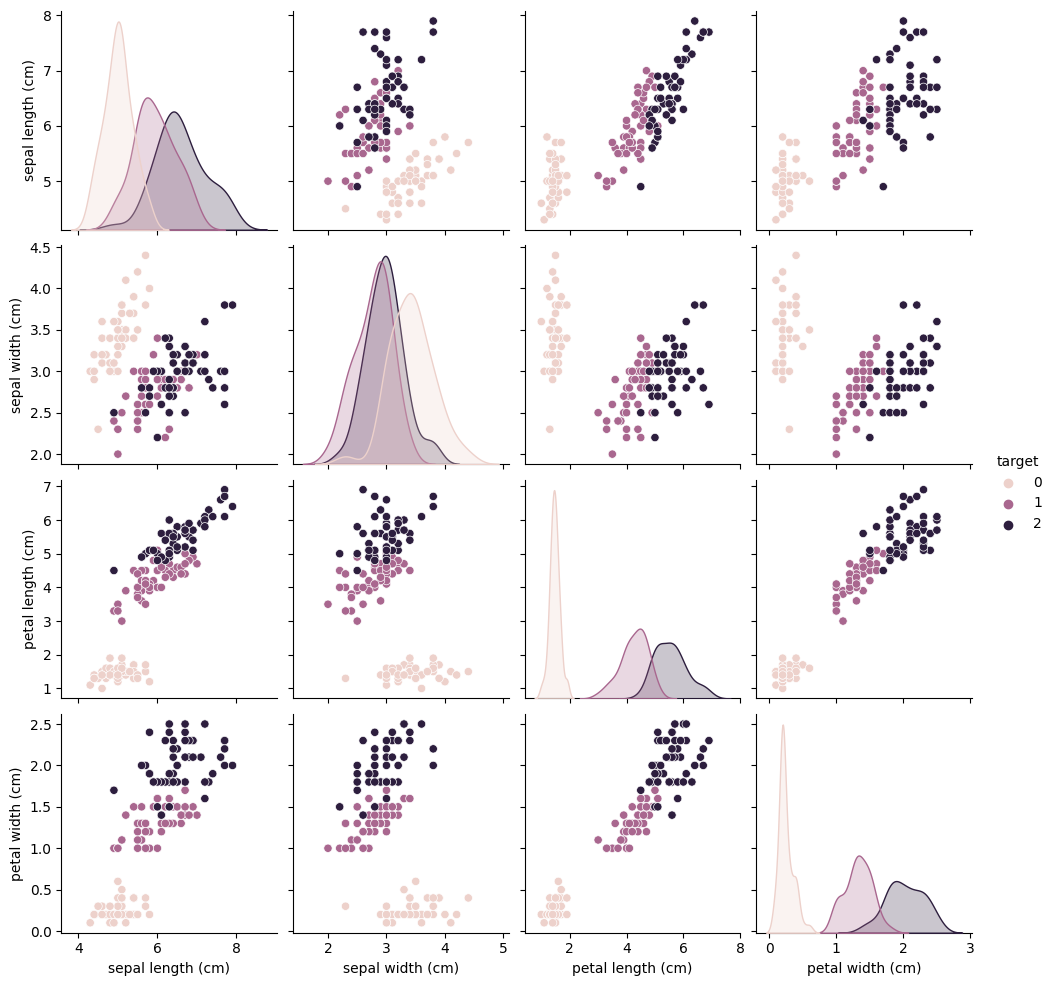

In [4]:
# Create a pairplot with the color of each dot corresponding to the type of iris
sns.pairplot(iris_data, hue='target')

In [5]:
# Features are the inputs/X-data
features = iris_data.drop(columns=['target'])

# labels are the outputs/y-data/targets
labels = iris_data['target']

In [6]:
# Splot the data into training and test data sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

In [7]:
# Define, train, and predict with a ridge classifier
ridge_classifier = RidgeClassifier()
ridge_classifier.fit(X_train, y_train)
y_pred = ridge_classifier.predict(X_test)

In [8]:
# Calculate the accuracy score, where 1.0 means 100% of predictions are correct
print(ridge_classifier.score(X_test, y_test))

0.7666666666666667


In [9]:
# Print out a confusion matrix
confusion_matrix(y_test, y_pred)

array([[ 8,  0,  0],
       [ 0,  4,  5],
       [ 0,  2, 11]])

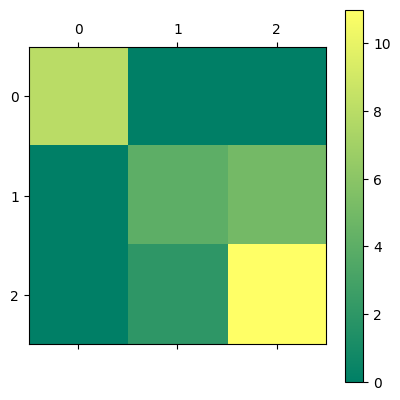

In [10]:
# Display the confusion matrix in a better way with matshow
confusion = confusion_matrix(y_test, y_pred)
plt.matshow(confusion, cmap='summer')
plt.colorbar()

0.9


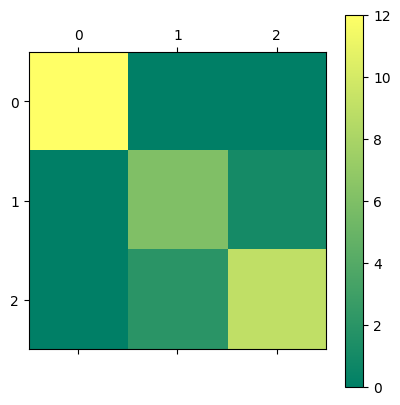

In [11]:
# Since RidgeClassifier is a regularized method, attempt to improve performance
# by scaling the results
scaler = StandardScaler()
scaler.fit(features)
features_Z = scaler.transform(features)

X_train, X_test, y_train, y_test = train_test_split(features_Z, labels, test_size=0.2)

ridge_classifier = RidgeClassifier()
ridge_classifier.fit(X_train, y_train)
y_pred = ridge_classifier.predict(X_test)

print(ridge_classifier.score(X_test, y_test))

confusion = confusion_matrix(y_test, y_pred)

plt.matshow(confusion, cmap='summer')
plt.colorbar()

In [12]:
# Attempt to improve the performance with hyperparameter tuning
best_score = 0
best_alpha = None
for alpha in np.logspace(-5, 2, 5000):
    ridge_classifier = RidgeClassifier(alpha = alpha)
    ridge_classifier.fit(X_train, y_train)
    y_pred = ridge_classifier.predict(X_test)

    score = ridge_classifier.score(X_test, y_test)

    if score > best_score:
        best_score = score
        best_alpha = alpha

print('BEST ALPHA:', best_alpha)
print('BEST SCORE:', best_score)

BEST ALPHA: 5.283778324166959
BEST SCORE: 0.9333333333333333


## Potential Problems with Classification Data Sets
* There may not be clear differences between the different categories; may need a powerful classification algorithm
* Data sets may represent categorical data as text (LabelEncoder)